In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

In [51]:
df = pd.read_csv(r"E:\Data Science by SRK\Machine_learning\Classification\Wine_data\cleaned_dataset_Wine.csv")

In [52]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Quality
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Quality               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [54]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Quality                 0
dtype: int64

# X and y

In [55]:
X = df.drop(columns = ['Quality'])
y = df['Quality']

# Train_test_split

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= True)

# XGBoost

**Applying Hyperparameter tuning for identifying best parameters for xgboost**

In [57]:
# !pip install xgboost


In [58]:
from sklearn.model_selection import GridSearchCV

# modelling

from xgboost import XGBClassifier

estimator_xgb = XGBClassifier()

# parameters grid
param_grid_xgb = {"n_estimators" : [1,5,10,20],
                  'max_depth': [3,4,5],
                'gamma' : [0.1, 0.15, 0.3, 0.5, 1]}

# grid search
grid_xgb = GridSearchCV(estimator_xgb, param_grid_xgb, cv = 5, scoring = 'accuracy')
grid_xgb.fit(X_train, y_train)

# best parameters for XGBoostingClassifier model
grid_xgb.best_params_

{'gamma': 0.1, 'max_depth': 3, 'n_estimators': 10}

# XGB Model imortant features

In [59]:
feats_xgb = pd.DataFrame(data=grid_xgb.best_estimator_.feature_importances_,
                        index = X.columns,
                        columns=['Importance'])
imp_features_list_xgb = feats_xgb[feats_xgb['Importance'] > 0].index.to_list()
imp_features_list_xgb

['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280',
 'Proline']

# Xtreme GradientBoost with important features and best hyperparameters

In [60]:
X_imp_xgb = X[imp_features_list_xgb]

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_imp_xgb, y, test_size = 0.2,
                                                                   random_state = True)

# modelling
from xgboost import XGBClassifier
xgb = XGBClassifier(gamma = 0.1, max_depth = 3, n_estimators = 20)
xgb.fit(X_train_xgb, y_train_xgb)

#Evaluation train data
from sklearn.metrics import accuracy_score
ypred_train = xgb.predict(X_train_xgb)
print("Train accuracy : ", accuracy_score(y_train_xgb, ypred_train))

# Cross_val_score
from sklearn.model_selection import cross_val_score
print("cross_val_score : ", cross_val_score(xgb, X_train_xgb, y_train_xgb, cv = 5).mean())

#Evaluation test data
ypred_test = xgb.predict(X_test_xgb)
print("Test accuracy : ", accuracy_score(y_test_xgb, ypred_test))


Train accuracy :  1.0
cross_val_score :  0.9716748768472907
Test accuracy :  0.9722222222222222


In [61]:
%%timeit
xgb.fit(X_train_xgb, y_train_xgb)


32 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Final model

In [62]:
xgb = XGBClassifier(gamma = 0.1, max_depth = 3, n_estimators = 20)


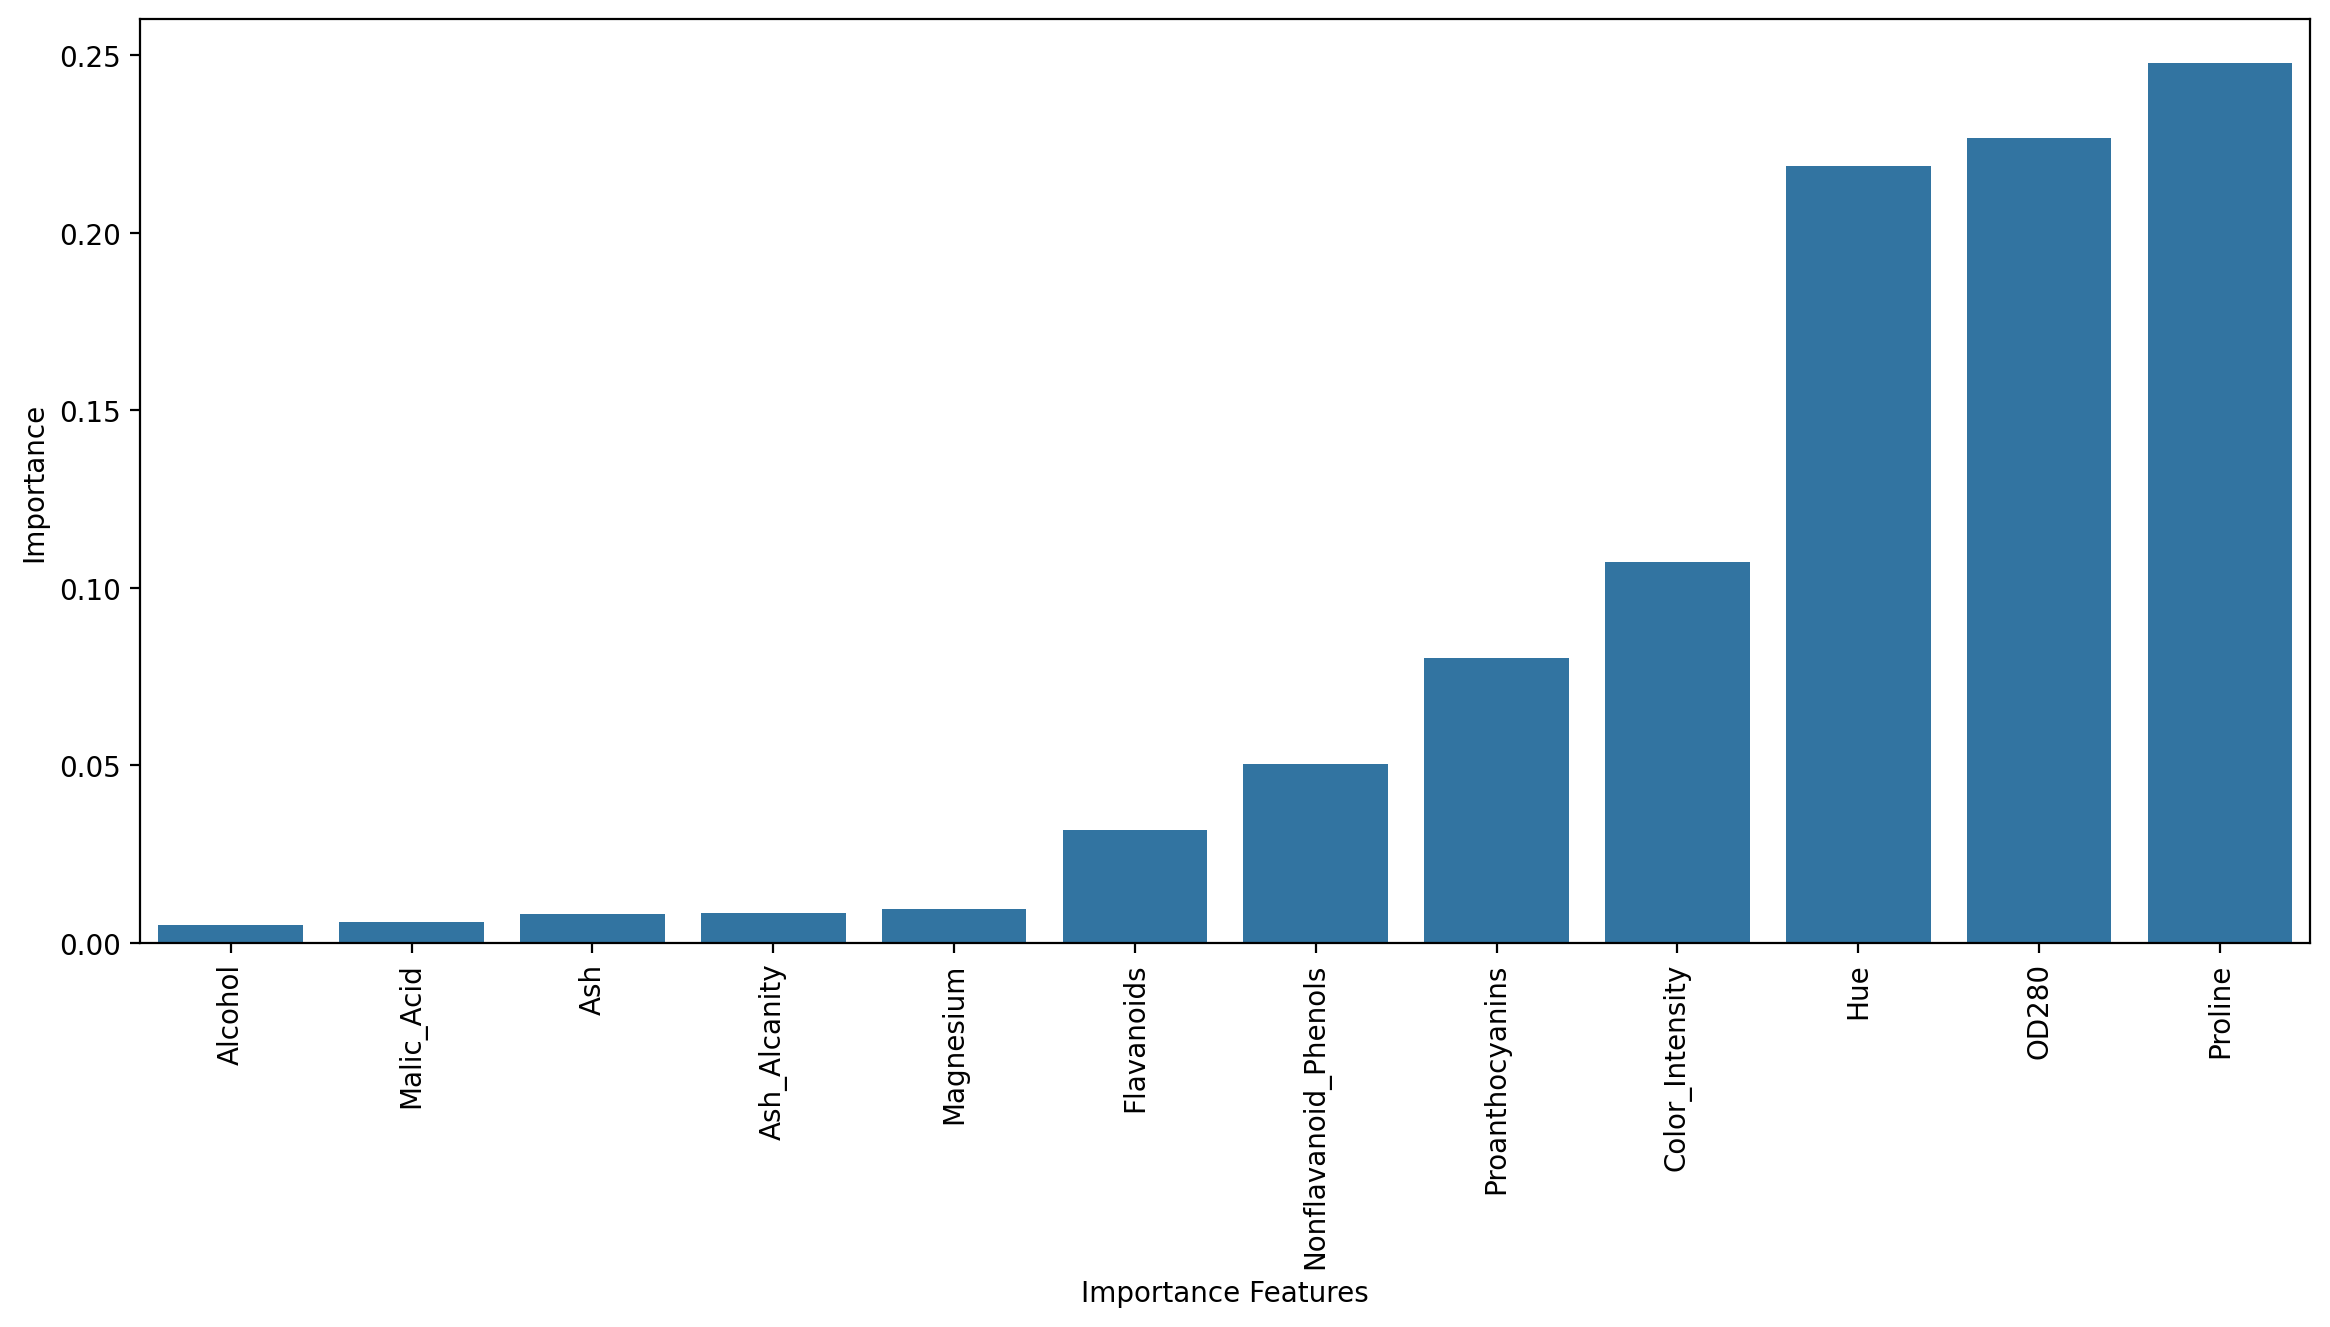

In [63]:
plt.figure(figsize = (14,6), dpi = 200)

sns.barplot(data = feats_xgb[feats_xgb['Importance'] > 0].sort_values('Importance'),
           x = feats_xgb[feats_xgb['Importance'] > 0].index,
           y = 'Importance')
plt.xticks(rotation = 90)
plt.xlabel('Importance Features')
plt.show()

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_xgb, ypred_test)

array([[14,  0,  0],
       [ 1, 12,  0],
       [ 0,  0,  9]], dtype=int64)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



In [70]:
df['Quality'].unique()

array([0, 1, 2], dtype=int64)